In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/facial_expression/fer2013

/content/drive/MyDrive/facial_expression/fer2013


In [3]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [5]:
basemodel4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(4, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel16 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel32 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel64 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel128 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel256 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel512 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel1024 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1024, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel2048 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(2048, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel4096 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(4096, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [6]:
basemodel4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [7]:
basemodel16.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [8]:
basemodel32.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [9]:
basemodel64.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [10]:
basemodel128.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
basemodel256.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
basemodel512.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [13]:
basemodel1024.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [14]:
basemodel2048.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [15]:
basemodel4096.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=["accuracy"])

In [16]:
try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)
print(checkpoint_path)
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

checkpoint/best_model.h5


In [17]:
from keras import callbacks
filename4='model4_train_new.csv'
filename16='model16_train_new.csv'
filename32='model32_train_new.csv'
filename64='model64_train_new.csv'
filename128='model128_train_new.csv'
filename256='model256_train_new.csv'
filename512='model512_train_new.csv'
filename1024='model1024_train_new.csv'
filename2048='model2048_train_new.csv'
filename4096='model4096_train_new.csv'

filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath32 = os.path.join('checkpoint', filename32)
filepath64 = os.path.join('checkpoint', filename64)
filepath128 = os.path.join('checkpoint', filename128)
filepath256 = os.path.join('checkpoint', filename256)
filepath512 = os.path.join('checkpoint', filename512)
filepath1024 = os.path.join('checkpoint', filename1024)
filepath2048 = os.path.join('checkpoint', filename2048)
filepath4096 = os.path.join('checkpoint', filename4096)

checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint32 = callbacks.ModelCheckpoint(filepath32, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint128 = callbacks.ModelCheckpoint(filepath128, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint256 = callbacks.ModelCheckpoint(filepath256, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint512 = callbacks.ModelCheckpoint(filepath512, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint1024 = callbacks.ModelCheckpoint(filepath1024, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint2048 = callbacks.ModelCheckpoint(filepath2048, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4096 = callbacks.ModelCheckpoint(filepath4096, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

In [18]:
hist4 = basemodel4.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint4)

Epoch 1/20
1010/1010 [==============================] - 46s 17ms/step - loss: 1.8743 - accuracy: 0.2500 - val_loss: 1.8362 - val_accuracy: 0.2510

Epoch 00001: val_accuracy improved from -inf to 0.25104, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.8256 - accuracy: 0.2504 - val_loss: 1.8171 - val_accuracy: 0.2510

Epoch 00002: val_accuracy did not improve from 0.25104
Epoch 3/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.8150 - accuracy: 0.2504 - val_loss: 1.8116 - val_accuracy: 0.2510

Epoch 00003: val_accuracy did not improve from 0.25104
Epoch 4/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.8118 - accuracy: 0.2504 - val_loss: 1.8100 - val_accuracy: 0.2510

Epoch 00004: val_accuracy did not improve from 0.25104
Epoch 5/20
1010/1010 [==============================] - 17s 17ms/ste

In [19]:
hist16 = basemodel16.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint16)

Epoch 1/20
1010/1010 [==============================] - 18s 17ms/step - loss: 1.7987 - accuracy: 0.2460 - val_loss: 1.6931 - val_accuracy: 0.3352

Epoch 00001: val_accuracy improved from -inf to 0.33519, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.6705 - accuracy: 0.3053 - val_loss: 1.5672 - val_accuracy: 0.3756

Epoch 00002: val_accuracy improved from 0.33519 to 0.37559, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.6067 - accuracy: 0.3383 - val_loss: 1.4980 - val_accuracy: 0.4087

Epoch 00003: val_accuracy improved from 0.37559 to 0.40875, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 4/20

In [20]:
hist32 = basemodel32.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint32)

Epoch 1/20
1010/1010 [==============================] - 18s 17ms/step - loss: 1.7492 - accuracy: 0.2863 - val_loss: 1.5881 - val_accuracy: 0.3672

Epoch 00001: val_accuracy improved from -inf to 0.36723, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.5722 - accuracy: 0.3757 - val_loss: 1.4495 - val_accuracy: 0.4319

Epoch 00002: val_accuracy improved from 0.36723 to 0.43188, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.4757 - accuracy: 0.4171 - val_loss: 1.3806 - val_accuracy: 0.4611

Epoch 00003: val_accuracy improved from 0.43188 to 0.46113, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 4/20

In [21]:
hist64 = basemodel64.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint64)

Epoch 1/20
1010/1010 [==============================] - 18s 17ms/step - loss: 1.6995 - accuracy: 0.3180 - val_loss: 1.5490 - val_accuracy: 0.3828

Epoch 00001: val_accuracy improved from -inf to 0.38284, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.4837 - accuracy: 0.4255 - val_loss: 1.3810 - val_accuracy: 0.4639

Epoch 00002: val_accuracy improved from 0.38284 to 0.46392, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.3805 - accuracy: 0.4694 - val_loss: 1.3374 - val_accuracy: 0.5038

Epoch 00003: val_accuracy improved from 0.46392 to 0.50376, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 4/20

In [22]:
hist128 = basemodel128.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint128)

Epoch 1/20
1010/1010 [==============================] - 18s 17ms/step - loss: 1.6723 - accuracy: 0.3266 - val_loss: 1.5109 - val_accuracy: 0.4294

Epoch 00001: val_accuracy improved from -inf to 0.42937, saving model to checkpoint/model128_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model128_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.4345 - accuracy: 0.4476 - val_loss: 1.3352 - val_accuracy: 0.4742

Epoch 00002: val_accuracy improved from 0.42937 to 0.47423, saving model to checkpoint/model128_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model128_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 17s 17ms/step - loss: 1.3329 - accuracy: 0.4894 - val_loss: 1.2463 - val_accuracy: 0.5216

Epoch 00003: val_accuracy improved from 0.47423 to 0.52159, saving model to checkpoint/model128_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model128_train_new.csv/assets
Epoc

In [23]:
hist256 = basemodel256.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint256)

Epoch 1/20
1010/1010 [==============================] - 19s 18ms/step - loss: 1.6604 - accuracy: 0.3352 - val_loss: 1.5080 - val_accuracy: 0.4249

Epoch 00001: val_accuracy improved from -inf to 0.42491, saving model to checkpoint/model256_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model256_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 18s 18ms/step - loss: 1.4425 - accuracy: 0.4448 - val_loss: 1.3539 - val_accuracy: 0.4776

Epoch 00002: val_accuracy improved from 0.42491 to 0.47757, saving model to checkpoint/model256_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model256_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 18s 18ms/step - loss: 1.3331 - accuracy: 0.4904 - val_loss: 1.2921 - val_accuracy: 0.5013

Epoch 00003: val_accuracy improved from 0.47757 to 0.50125, saving model to checkpoint/model256_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model256_train_new.csv/assets
Epoc

In [24]:
hist512 = basemodel512.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint512)

Epoch 1/20
1010/1010 [==============================] - 20s 19ms/step - loss: 1.6857 - accuracy: 0.3250 - val_loss: 1.5186 - val_accuracy: 0.4104

Epoch 00001: val_accuracy improved from -inf to 0.41042, saving model to checkpoint/model512_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model512_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 19s 19ms/step - loss: 1.4307 - accuracy: 0.4507 - val_loss: 1.3200 - val_accuracy: 0.4915

Epoch 00002: val_accuracy improved from 0.41042 to 0.49150, saving model to checkpoint/model512_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model512_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 19s 19ms/step - loss: 1.3172 - accuracy: 0.4989 - val_loss: 1.2608 - val_accuracy: 0.5068

Epoch 00003: val_accuracy improved from 0.49150 to 0.50683, saving model to checkpoint/model512_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model512_train_new.csv/assets
Epoc

In [25]:
hist1024 = basemodel1024.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint1024)

Epoch 1/20
1010/1010 [==============================] - 22s 21ms/step - loss: 1.6639 - accuracy: 0.3359 - val_loss: 1.4841 - val_accuracy: 0.4246

Epoch 00001: val_accuracy improved from -inf to 0.42463, saving model to checkpoint/model1024_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1024_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 21s 21ms/step - loss: 1.4274 - accuracy: 0.4489 - val_loss: 1.3303 - val_accuracy: 0.4809

Epoch 00002: val_accuracy improved from 0.42463 to 0.48091, saving model to checkpoint/model1024_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1024_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 21s 21ms/step - loss: 1.3150 - accuracy: 0.4976 - val_loss: 1.2553 - val_accuracy: 0.5174

Epoch 00003: val_accuracy improved from 0.48091 to 0.51741, saving model to checkpoint/model1024_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1024_train_new.csv/asset

In [26]:
hist2048 = basemodel2048.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint2048)

Epoch 1/20
1010/1010 [==============================] - 25s 24ms/step - loss: 1.7029 - accuracy: 0.3156 - val_loss: 1.5102 - val_accuracy: 0.3993

Epoch 00001: val_accuracy improved from -inf to 0.39928, saving model to checkpoint/model2048_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model2048_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 25s 24ms/step - loss: 1.4518 - accuracy: 0.4388 - val_loss: 1.3413 - val_accuracy: 0.4765

Epoch 00002: val_accuracy improved from 0.39928 to 0.47646, saving model to checkpoint/model2048_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model2048_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 25s 24ms/step - loss: 1.3389 - accuracy: 0.4839 - val_loss: 1.2753 - val_accuracy: 0.5088

Epoch 00003: val_accuracy improved from 0.47646 to 0.50878, saving model to checkpoint/model2048_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model2048_train_new.csv/asset

In [27]:
hist4096 = basemodel4096.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint4096)

Epoch 1/25
1010/1010 [==============================] - 45s 44ms/step - loss: 1.7162 - accuracy: 0.3165 - val_loss: 1.6190 - val_accuracy: 0.3834

Epoch 00001: val_accuracy improved from -inf to 0.38339, saving model to checkpoint/model4096_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4096_train_new.csv/assets
Epoch 2/25
1010/1010 [==============================] - 45s 44ms/step - loss: 1.5279 - accuracy: 0.4144 - val_loss: 1.4602 - val_accuracy: 0.4338

Epoch 00002: val_accuracy improved from 0.38339 to 0.43383, saving model to checkpoint/model4096_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4096_train_new.csv/assets
Epoch 3/25
1010/1010 [==============================] - 45s 44ms/step - loss: 1.4099 - accuracy: 0.4630 - val_loss: 1.3665 - val_accuracy: 0.4728

Epoch 00003: val_accuracy improved from 0.43383 to 0.47283, saving model to checkpoint/model4096_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4096_train_new.csv/asset

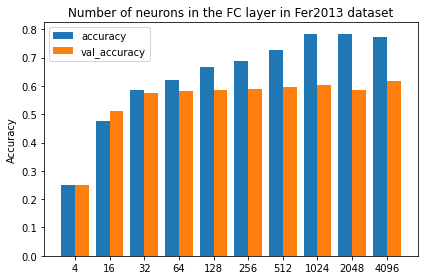

In [29]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['4', '16', '32', '64', '128', '256', '512', '1024', '2048', '4096']
accuracy = [np.amax(hist4.history['accuracy']),
             np.amax(hist16.history['accuracy']),
             np.amax(hist32.history['accuracy']),
             np.amax(hist64.history['accuracy']), 
             np.amax(hist128.history['accuracy']),
             np.amax(hist256.history['accuracy']),
             np.amax(hist512.history['accuracy']),
             np.amax(hist1024.history['accuracy']),
             np.amax(hist2048.history['accuracy']),
             np.amax(hist4096.history['accuracy'])]
                       
val_accuracy = [np.amax(hist4.history['val_accuracy']),
             np.amax(hist16.history['val_accuracy']),
             np.amax(hist32.history['val_accuracy']),
             np.amax(hist64.history['val_accuracy']), 
             np.amax(hist128.history['val_accuracy']),
             np.amax(hist256.history['val_accuracy']),
             np.amax(hist512.history['val_accuracy']),
             np.amax(hist1024.history['val_accuracy']),
             np.amax(hist2048.history['val_accuracy']),
             np.amax(hist4096.history['val_accuracy'])]

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='val_accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of neurons in the FC layer in Fer2013 dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()